# 25 - Testing Distribution Assumptions

**Key Idea:** Many statistical tests assume your data follows a normal (bell curve) distribution. If it doesn't, results might be wrong.

**The Baking Analogy:** Like baking a cake - the recipe assumes the right oven temperature. Wrong temperature = cake flops. Wrong distribution = test results flop.

**How to Check:**
- **Visual:** Histogram (does it look bell-shaped?), Q-Q plot (points follow the line?)
- **Statistical:** Shapiro-Wilk test (p-value > 0.05 = normal)
- **Fix:** If not normal, transform data (log, square root) or use different tests

## Simple Example: Three Different "Ovens"

Imagine three ovens baking cookies. Each produces different patterns of doneness.

/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_62308/3307100651.py:54: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_62308/3307100651.py:54: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


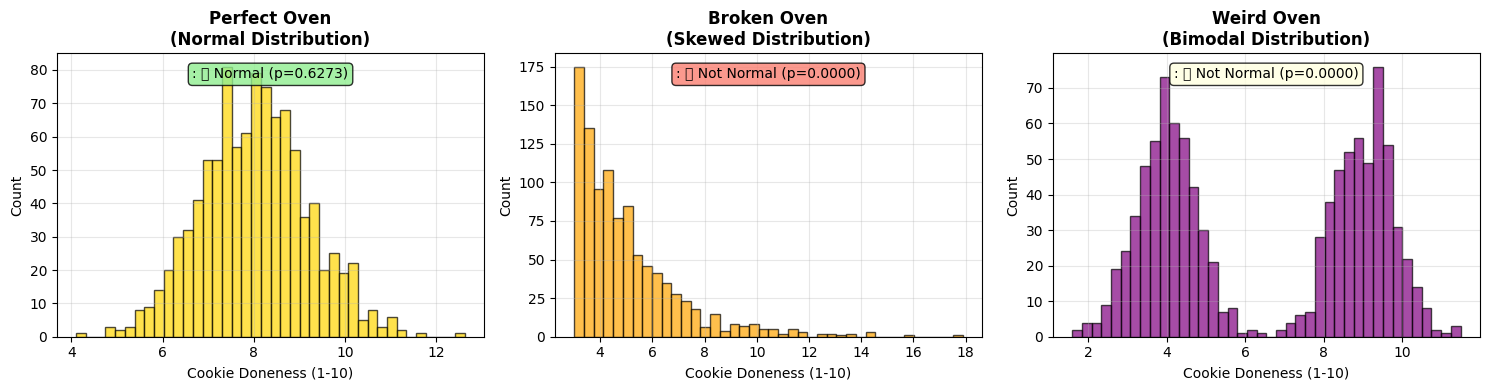


🍪 Oven Results:
Perfect Oven: ✅ Normal (p=0.6273)
Broken Oven: ❌ Not Normal (p=0.0000)
Weird Oven: ❌ Not Normal (p=0.0000)

→ Only the perfect oven passes the normality test!
→ Use standard tests for normal data, transform or use alternatives for non-normal


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(42)

# Three different "ovens" producing cookies with different doneness patterns
perfect_oven = np.random.normal(8, 1.2, 1000)  # Normal: most cookies perfectly done
broken_oven = np.random.exponential(2, 1000) + 3  # Skewed: mostly underdone
weird_oven = np.concatenate([
    np.random.normal(4, 0.8, 500),   # Either underdone
    np.random.normal(9, 0.8, 500)    # Or overdone (bimodal)
])

# Test normality with Shapiro-Wilk
def test_normality(data, name):
    stat, p_value = stats.shapiro(data[:1000])  # Shapiro limit
    is_normal = "✅ Normal" if p_value > 0.05 else "❌ Not Normal"
    return f"{name}: {is_normal} (p={p_value:.4f})"

# Visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

# Perfect oven (normal)
ax1.hist(perfect_oven, bins=40, color='gold', alpha=0.7, edgecolor='black')
ax1.set_title('Perfect Oven\n(Normal Distribution)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Cookie Doneness (1-10)')
ax1.set_ylabel('Count')
ax1.text(0.5, 0.95, test_normality(perfect_oven, ''), 
         transform=ax1.transAxes, ha='center', va='top',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))
ax1.grid(alpha=0.3)

# Broken oven (skewed)
ax2.hist(broken_oven, bins=40, color='orange', alpha=0.7, edgecolor='black')
ax2.set_title('Broken Oven\n(Skewed Distribution)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Cookie Doneness (1-10)')
ax2.set_ylabel('Count')
ax2.text(0.5, 0.95, test_normality(broken_oven, ''),
         transform=ax2.transAxes, ha='center', va='top',
         bbox=dict(boxstyle='round', facecolor='salmon', alpha=0.8))
ax2.grid(alpha=0.3)

# Weird oven (bimodal)
ax3.hist(weird_oven, bins=40, color='purple', alpha=0.7, edgecolor='black')
ax3.set_title('Weird Oven\n(Bimodal Distribution)', fontsize=12, fontweight='bold')
ax3.set_xlabel('Cookie Doneness (1-10)')
ax3.set_ylabel('Count')
ax3.text(0.5, 0.95, test_normality(weird_oven, ''),
         transform=ax3.transAxes, ha='center', va='top',
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))
ax3.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🍪 Oven Results:")
print(test_normality(perfect_oven, "Perfect Oven"))
print(test_normality(broken_oven, "Broken Oven"))
print(test_normality(weird_oven, "Weird Oven"))
print("\n→ Only the perfect oven passes the normality test!")
print("→ Use standard tests for normal data, transform or use alternatives for non-normal")

## Visual Testing: Q-Q Plots

Q-Q (Quantile-Quantile) plots show if data matches a normal distribution. Points should follow the diagonal line.

/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_62308/2527064539.py:19: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_62308/2527064539.py:19: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


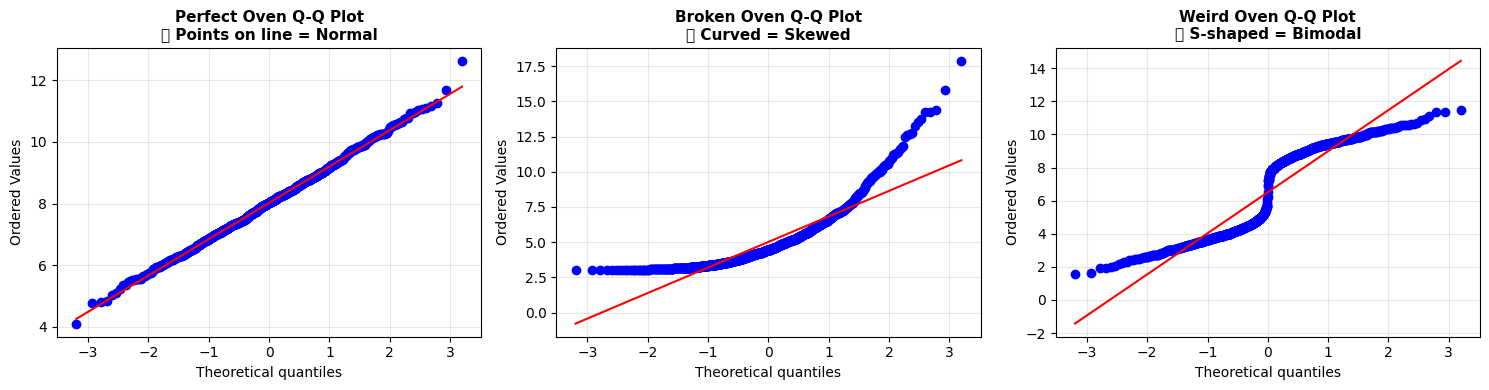


📊 Q-Q Plot Interpretation:
   • Points follow diagonal line → Data is normal
   • Curved line → Data is skewed
   • S-shaped → Multiple peaks (bimodal/multimodal)
   • Points far from line → Outliers or heavy tails


In [2]:
# Q-Q plots for each oven
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

# Perfect oven Q-Q plot
stats.probplot(perfect_oven, dist="norm", plot=ax1)
ax1.set_title('Perfect Oven Q-Q Plot\n✅ Points on line = Normal', fontsize=11, fontweight='bold')
ax1.grid(alpha=0.3)

# Broken oven Q-Q plot
stats.probplot(broken_oven, dist="norm", plot=ax2)
ax2.set_title('Broken Oven Q-Q Plot\n❌ Curved = Skewed', fontsize=11, fontweight='bold')
ax2.grid(alpha=0.3)

# Weird oven Q-Q plot
stats.probplot(weird_oven, dist="norm", plot=ax3)
ax3.set_title('Weird Oven Q-Q Plot\n❌ S-shaped = Bimodal', fontsize=11, fontweight='bold')
ax3.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Q-Q Plot Interpretation:")
print("   • Points follow diagonal line → Data is normal")
print("   • Curved line → Data is skewed")
print("   • S-shaped → Multiple peaks (bimodal/multimodal)")
print("   • Points far from line → Outliers or heavy tails")

## Real-World Example: Marketing ROI (Return on Investment)

Marketing campaigns often have skewed ROI - most ads perform poorly, a few hit big. Log transformation can help.

/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_62308/3402063330.py:53: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_62308/3402063330.py:53: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


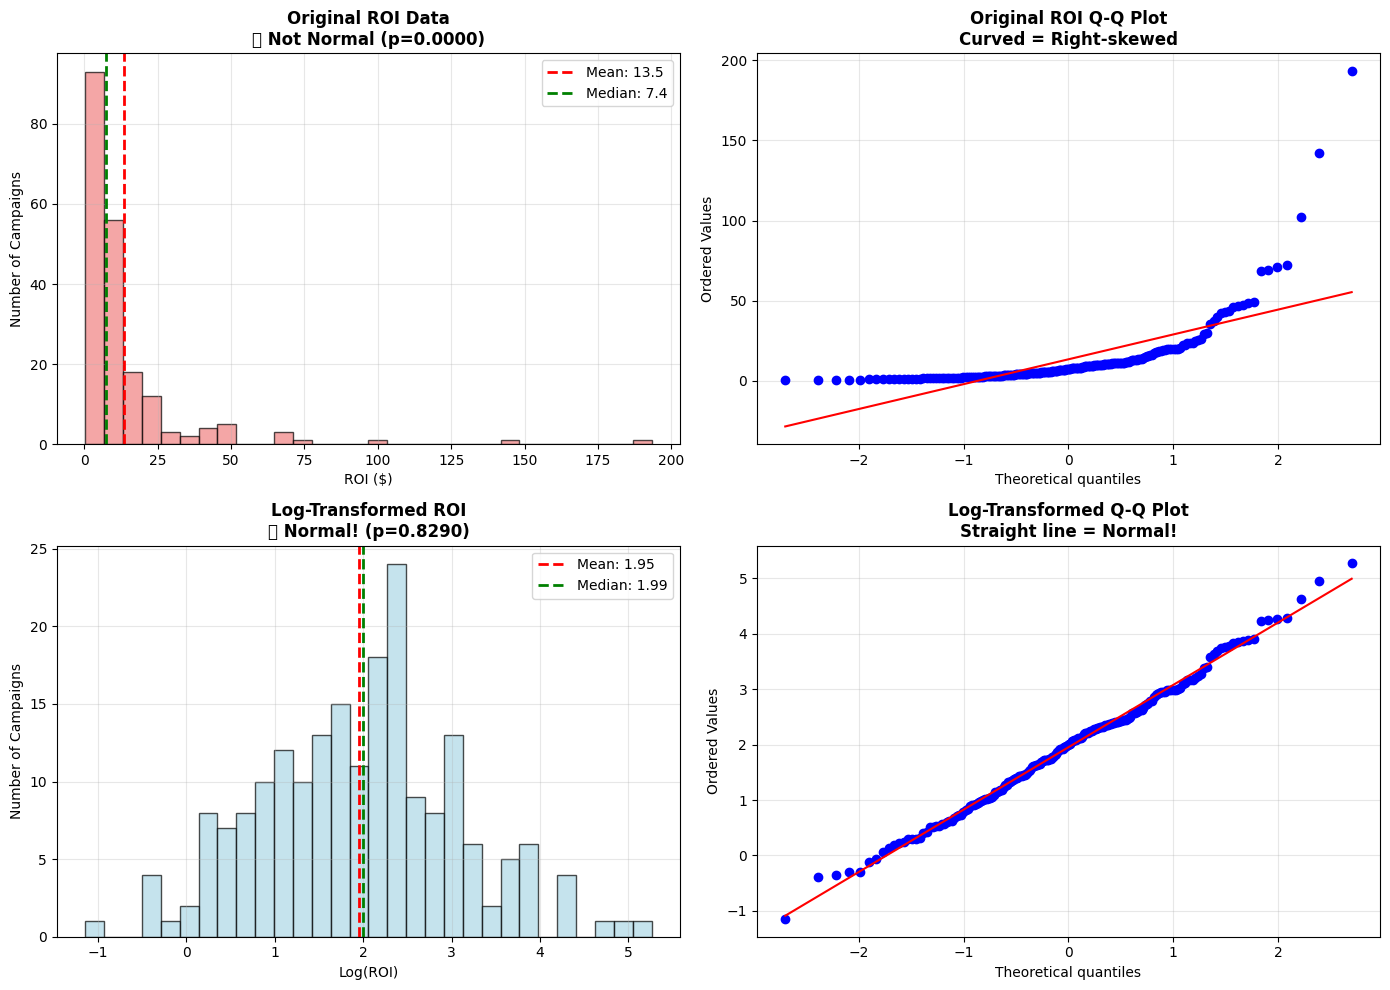


📊 Marketing ROI Analysis:
   Original data: p-value = 0.0000 ❌
   Log-transformed: p-value = 0.8290 ✅

💡 Business Insight:
   • Original: Mean $13.5, Median $7.4
   • Mean pulled up by few big winners (typical of marketing!)
   • Log transformation allows proper statistical testing
   • Now can use t-tests, ANOVA, regression on transformed data


In [3]:
# Simulate marketing campaign ROI data (right-skewed)
np.random.seed(42)
roi_data = np.random.lognormal(2, 1.2, 200)  # Most campaigns low ROI, few big winners

# Apply log transformation
roi_transformed = np.log(roi_data)

# Test normality
_, p_original = stats.shapiro(roi_data)
_, p_transformed = stats.shapiro(roi_transformed)

# Visualize before and after transformation
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Original: Histogram
axes[0, 0].hist(roi_data, bins=30, color='lightcoral', alpha=0.7, edgecolor='black')
axes[0, 0].axvline(np.mean(roi_data), color='red', linestyle='--', linewidth=2, 
                   label=f'Mean: {np.mean(roi_data):.1f}')
axes[0, 0].axvline(np.median(roi_data), color='green', linestyle='--', linewidth=2,
                   label=f'Median: {np.median(roi_data):.1f}')
axes[0, 0].set_title(f'Original ROI Data\n❌ Not Normal (p={p_original:.4f})', 
                     fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('ROI ($)')
axes[0, 0].set_ylabel('Number of Campaigns')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Original: Q-Q Plot
stats.probplot(roi_data, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Original ROI Q-Q Plot\nCurved = Right-skewed', 
                     fontsize=12, fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# Transformed: Histogram
axes[1, 0].hist(roi_transformed, bins=30, color='lightblue', alpha=0.7, edgecolor='black')
axes[1, 0].axvline(np.mean(roi_transformed), color='red', linestyle='--', linewidth=2,
                   label=f'Mean: {np.mean(roi_transformed):.2f}')
axes[1, 0].axvline(np.median(roi_transformed), color='green', linestyle='--', linewidth=2,
                   label=f'Median: {np.median(roi_transformed):.2f}')
axes[1, 0].set_title(f'Log-Transformed ROI\n✅ Normal! (p={p_transformed:.4f})',
                     fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Log(ROI)')
axes[1, 0].set_ylabel('Number of Campaigns')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Transformed: Q-Q Plot
stats.probplot(roi_transformed, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Log-Transformed Q-Q Plot\nStraight line = Normal!',
                     fontsize=12, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Marketing ROI Analysis:")
print(f"   Original data: p-value = {p_original:.4f} {'✅' if p_original > 0.05 else '❌'}")
print(f"   Log-transformed: p-value = {p_transformed:.4f} {'✅' if p_transformed > 0.05 else '❌'}")
print(f"\n💡 Business Insight:")
print(f"   • Original: Mean ${np.mean(roi_data):.1f}, Median ${np.median(roi_data):.1f}")
print(f"   • Mean pulled up by few big winners (typical of marketing!)")
print(f"   • Log transformation allows proper statistical testing")
print(f"   • Now can use t-tests, ANOVA, regression on transformed data")

## Summary: Testing Distribution Assumptions

### Why It Matters
Many tests (t-test, ANOVA, linear regression) assume normal distribution. Wrong assumption → wrong conclusions.

### How to Check
| Method | What to Look For | Tool |
|--------|------------------|------|
| **Histogram** | Bell-shaped curve | Visual inspection |
| **Q-Q Plot** | Points follow diagonal line | `stats.probplot()` |
| **Shapiro-Wilk** | p-value > 0.05 | `stats.shapiro()` |

### What to Do If Not Normal
1. **Transform data:** Log (for right-skewed), square root (for counts), Box-Cox (automatic)
2. **Use non-parametric tests:** Mann-Whitney instead of t-test, Kruskal-Wallis instead of ANOVA
3. **Use robust methods:** Median instead of mean, bootstrap confidence intervals
4. **Large samples:** Central Limit Theorem helps (n > 30)

### Real-World Applications
- **Marketing ROI:** Usually right-skewed → Use log transformation
- **Sales data:** Check distribution before forecasting
- **Quality control:** Monitor if process stays normal
- **A/B testing:** Ensure valid comparison method

**Remember:** Like checking oven temperature before baking - always check distribution before testing!